## Long-term performance analysis

This analysis provides a clear 20-year perspective on global equity performance, highlighting the importance of sector and geographic allocation in portfolio construction.

---

In [2]:

# Yahoo Finance
import yfinance as yf

# Core Libraries
from datetime import datetime

# Data and Math
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import Javascript

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


**Cumulative return of major global stock indices** from 2004 to 2024, with all indices **normalized to a base value of 1 in 2004**

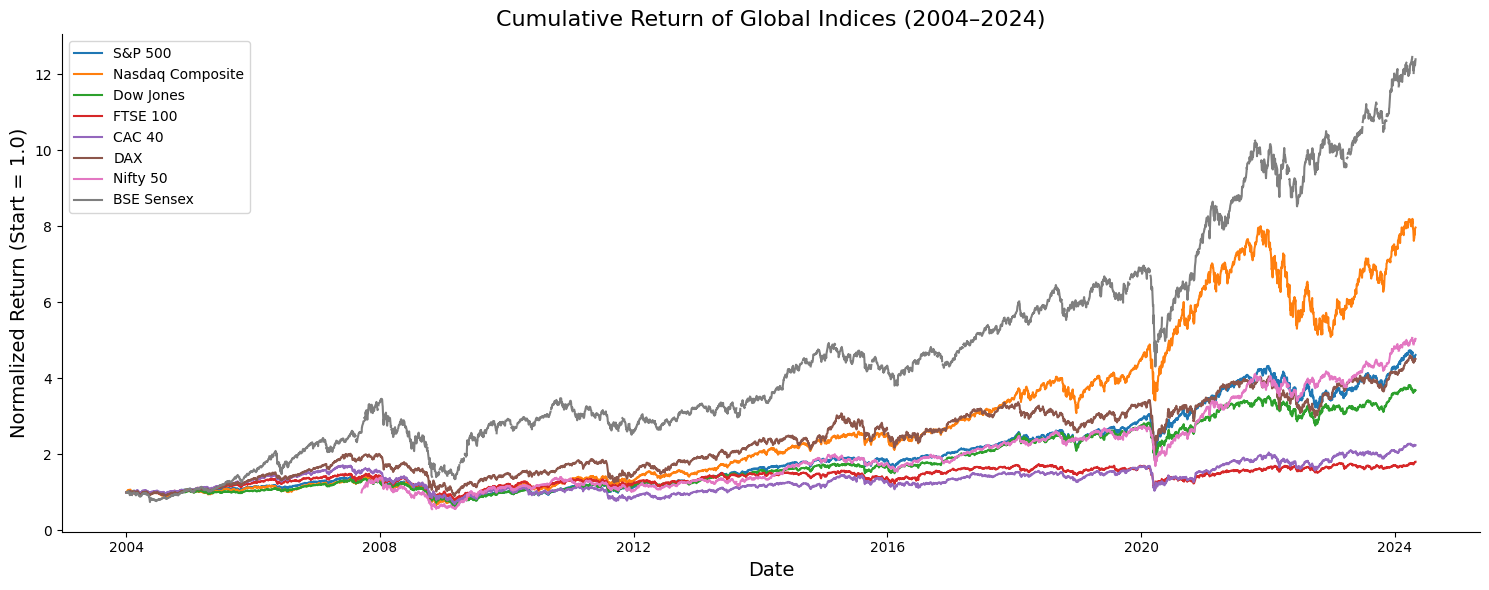

In [3]:

# Define indices and date range
indices = ['^GSPC', '^IXIC', '^DJI', '^FTSE', '^FCHI', '^GDAXI', '^NSEI', '^BSESN']
start = '2004-01-01'
end = '2024-04-30'

# Metadata for display
index_metadata = {
    '^GSPC': 'S&P 500',
    '^IXIC': 'Nasdaq Composite',
    '^DJI': 'Dow Jones',
    '^FTSE': 'FTSE 100',
    '^FCHI': 'CAC 40',
    '^GDAXI': 'DAX',
    '^NSEI': 'Nifty 50',
    '^BSESN': 'BSE Sensex'
}

# DataFrame to hold normalized prices
returns_df = pd.DataFrame()

for ticker in indices:
    data = yf.download(ticker, start=start, end=end, progress=False)['Close']
    if data.empty:
        continue
    name = index_metadata[ticker]
    cumulative_return = data / data.iloc[0]  # Normalize to 1
    returns_df[name] = cumulative_return

plt.figure(figsize=(15, 6))

for column in returns_df.columns:
    plt.plot(returns_df.index, returns_df[column], label=column)

plt.title("Cumulative Return of Global Indices (2004–2024)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Normalized Return (Start = 1.0)", fontsize=14)
plt.legend()

# Remove grid lines
plt.grid(False)

# Keep only bottom and left spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.tight_layout()
#plt.figtext(
 #   0.5, -0.15,
 #   "Figure: This plot compares the cumulative returns of major global indices from 2004 to 2024.  It normalizes prices at the starting point to visualize relative growth over time. The plot highlights performance divergence among developed and emerging market indices",
 #   wrap=True, horizontalalignment='center', fontsize=18)
plt.show()


In [4]:

# Corresponding names and constituent counts
index_metadata = {
    '^GSPC': ('S&P 500', 'USA', 500),
    '^IXIC': ('Nasdaq Composite', 'USA', 100),
    '^DJI': ('Dow Jones', 'USA', 30),
    '^FTSE': ('FTSE 100', 'UK', 100),
    '^FCHI': ('CAC 40', 'France', 40),
    '^GDAXI': ('DAX', 'Germany', 40),
    '^NSEI': ('Nifty 50', 'India', 50),
    '^BSESN': ('BSE Sensex', 'India', 30)
}

results = []

# Fetch and process data
for ticker in indices:
    data = yf.download(ticker, start=start, end=end, progress=False)

    if data.empty:
        continue

    start_price = data['Close'].iloc[0]
    end_price = data['Close'].iloc[-1]
    cumulative_return = float(((end_price - start_price) / start_price) * 100)
    avg_volume = float(data['Volume'].mean() / 10_000_000)

    name, country, constituents = index_metadata[ticker]
    results.append({
        "Name": name,
        "Country": country,
        "Constituent Count": constituents,
        "20Y Cumulative Return (%)": round(cumulative_return, 2),
        "Avg. Daily Volume (x10M shares)": round(avg_volume, 2)
    })

# Convert to DataFrame
df_index_summary = pd.DataFrame(results)
df_index_summary.sort_values("20Y Cumulative Return (%)", ascending=False, inplace=True)
df_index_summary.reset_index(drop=True, inplace=True)

df_index_summary



,Name,Country,Constituent Count,20Y Cumulative Return (%),Avg. Daily Volume (x10M shares)
0,BSE Sensex,India,30,1139.03,0.01
1,Nasdaq Composite,USA,100,696.49,257.73
2,Nifty 50,India,50,403.79,0.02
3,S&P 500,USA,500,361.55,374.11
4,DAX,Germany,40,350.87,10.74
5,Dow Jones,USA,30,268.75,24.58
6,CAC 40,France,40,124.23,10.70
7,FTSE 100,UK,100,80.63,102.07


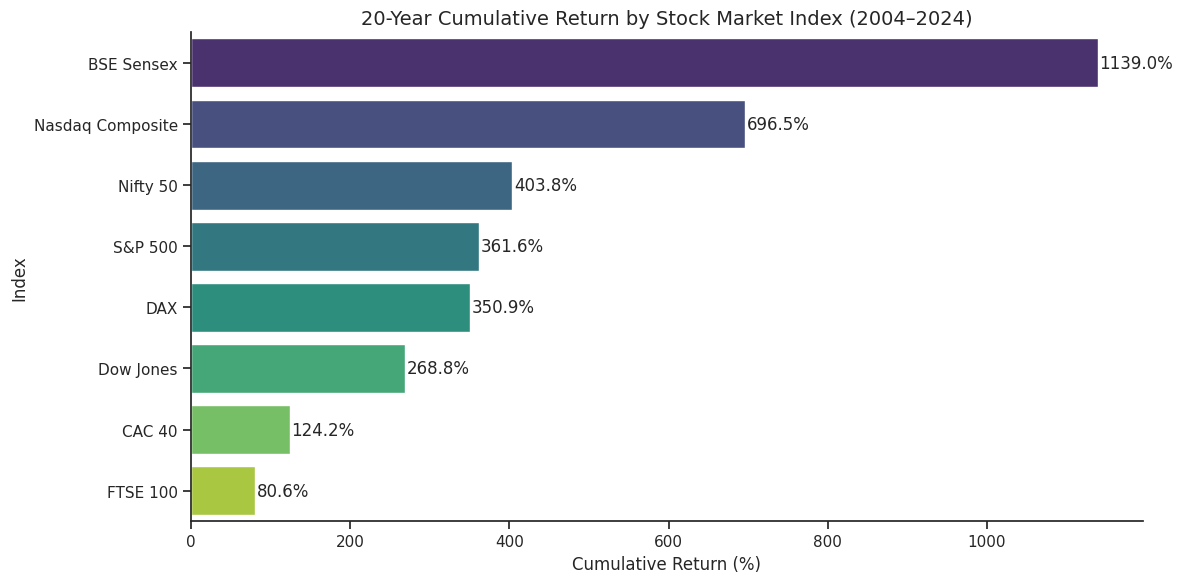

In [5]:

# Set plot style without grid
sns.set(style="white")

plt.figure(figsize=(12, 6))

# Create barplot
sns.barplot(
    x="20Y Cumulative Return (%)",
    y="Name",
    data=df_index_summary,
    palette="viridis"
)

# Annotate values
for i, row in df_index_summary.iterrows():
    plt.text(
        row["20Y Cumulative Return (%)"] + 2,  # offset to the right
        i,
        f'{row["20Y Cumulative Return (%)"]:.1f}%',
        va='center'
    )

# Remove top and right spines, keep only bottom and left
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Titles and labels
plt.title("20-Year Cumulative Return by Stock Market Index (2004–2024)", fontsize=14)
plt.xlabel("Cumulative Return (%)")
plt.ylabel("Index")

plt.tight_layout()
plt.show()
